# Project Title - EDA ON Property Listings in Kuala Lumpur  <a href="https://colab.research.google.com/drive/1Ta8kvxB4NlMHO204WZtrnfnVToPVr2J5?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this project, we are going to do an exploratory data analysis of the Property Listings in Kuala Lumpur. We have found from https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur.

We wish to compare the compare the residential property price in Kuala Lumpur.between different locations.

The technique/tool used we used in this EDA such as:

*   pandas
*   scipy
*   numpy
*   scikit-learn
*   matplotlib.pyplot
*   seaborn

**Group Members:**
1. **GOO YE JUI**
2. **KELVIN EE**

## Downloading the Dataset

**TODO** - 

1. **Create New API Token - It will download kaggle.json file on your machine.**

2. **Run the command needed to upload kaggle.json.**

3. **Make directory named kaggle and copy kaggle.json file there.**

4. **Change the permissions of the file.**

5. **Download the dataset chosen from kaggle using API command and list the files in the dataset.**

6. **Extract the dataset and read the .csv that you want.**

In [ ]:
#pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gooyejui","key":"8a3fd6f4fbc0b920a35a25f190a8d1d4"}'}

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# and we will move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
!kaggle datasets download -d dragonduck/property-listings-in-kuala-lumpur

  0% 0.00/628k [00:00<?, ?B/s]
100% 628k/628k [00:00<00:00, 115MB/s]


In [ ]:
! kaggle datasets files dragonduck/property-listings-in-kuala-lumpur

name             size  creationDate         
---------------  ----  -------------------  
data_kaggle.csv   6MB  2019-07-04 06:31:17  


The dataset has been downloaded and extracted.

In [ ]:
# Unzip the data remove zip
!unzip property-listings-in-kuala-lumpur.zip && rm property-listings-in-kuala-lumpur.zip

Archive:  property-listings-in-kuala-lumpur.zip
  inflating: data_kaggle.csv         


## Data Preparation and Cleaning

1. **Read the data_kaggle.csv**
2. **describe the dataset**
3. **remove null rows**
4. **create new columns (Price per sqft & property supergroup)**
5. **clean columns (Price, Locations, Size)**


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
df = pd.read_csv('/content/data_kaggle.csv')
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [ ]:
df.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, 
                         keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Car Parks,17567,0.326021
Furnishing,6930,0.128612
Bathrooms,2013,0.037359
Rooms,1706,0.031661
Size,1063,0.019728
Price,248,0.004603
Property Type,25,0.000464
Location,0,0.000000


In [ ]:
#remove null rows
df = df.dropna()
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53862,"Seputeh, Kuala Lumpur","RM 750,000",3,2.0,1.0,Condominium,Built-up : 915 sq. ft.,Partly Furnished
53868,"KL Sentral, Kuala Lumpur","RM 1,400,000",3+1,3.0,2.0,Condominium (Corner),Land area : 1544 sq. ft.,Fully Furnished
53869,"KL Eco City, Kuala Lumpur","RM 880,000",1,1.0,1.0,Condominium (Corner),Built-up : 650 sq. ft.,Partly Furnished
53876,"Sri Hartamas, Kuala Lumpur","RM 2,700,000",4+2,6.0,3.0,Condominium (Corner),"Built-up : 3,973 sq. ft.",Partly Furnished


In [ ]:
print(df.dtypes)

Location          object
Price             object
Rooms             object
Bathrooms        float64
Car Parks        float64
Property Type     object
Size              object
Furnishing        object
dtype: object


In [ ]:
df["Location"] = df["Location"].str.replace(", Kuala Lumpur$", "")
df["Location"] = df["Location"].str.lower()
sorted(df["Location"].unique())

<ipython-input-83-8b95d516dc8a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Location"] = df["Location"].str.replace(", Kuala Lumpur$", "")


['ampang',
 'ampang hilir',
 'bandar damai perdana',
 'bandar menjalara',
 'bandar tasik selatan',
 'bangsar',
 'bangsar south',
 'batu caves',
 'brickfields',
 'bukit bintang',
 'bukit damansara',
 'bukit jalil',
 'bukit kiara',
 'bukit ledang',
 'bukit tunku (kenny hills)',
 'canary residence',
 'casa rimba',
 'chan sow lin',
 'cheras',
 'city centre',
 'country heights damansara',
 'damansara',
 'damansara heights',
 'desa pandan',
 'desa parkcity',
 'desa petaling',
 'duta nusantara',
 'dutamas',
 'federal hill',
 'gombak',
 'gurney',
 'happy garden',
 'jalan ipoh',
 'jalan klang lama (old klang road)',
 'jalan kuching',
 'jalan sultan ismail',
 'jalan u-thant',
 'jinjang',
 'kepong',
 'keramat',
 'kl city',
 'kl eco city',
 'kl sentral',
 'klcc',
 'kota damansara',
 'kuala lumpur',
 'kuchai lama',
 'mid valley city',
 'mont kiara',
 'other',
 'oug',
 'pandan indah',
 'pandan jaya',
 'pandan perdana',
 'pantai',
 'petaling jaya',
 'puchong',
 'rawang',
 'salak selatan',
 'segambut'

In [ ]:
#convert price to int
df["Price"] = df["Price"].str.replace("RM", "")
df["Price"] = df["Price"].str.replace(",", "")
df["Price"] = df["Price"].str.strip()
df["Price"] = df["Price"].astype(str).astype(int)
print(df.dtypes)

Location          object
Price              int64
Rooms             object
Bathrooms        float64
Car Parks        float64
Property Type     object
Size              object
Furnishing        object
dtype: object


In [ ]:
#Split size into Size Type and Size Num
def split_size(val, index=0):
    try:
        return val.split(":")[index].strip()
    except AttributeError:
        return val
    
df["Size Type"] = df["Size"].apply(split_size, index=0)
df["Size Num"] = df["Size"].apply(split_size, index=1)

In [ ]:
#Convert size num to int
import re
def convert_size_num(size):
    try:
        # If it's not in square feet then I don't want to deal with all
        # possible conversions for now.
        if re.search(r"sq\.*\s*ft\.*", size) is None:
            return None
    
        size = size.replace(",", "")
        size = size.replace("'", "")
        size = size.replace("sq. ft.", "")
        size = size.replace("sf", "")
        size = size.strip()
        size = size.lower()
        
        add_mult_match = re.search(r"(\d+)\s*\+\s*(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if add_mult_match is not None:
            return int(add_mult_match.groups()[0]) + (
                int(add_mult_match.groups()[1]) * 
                int(add_mult_match.groups()[2]))
        
        mult_match = re.search(r"(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if mult_match is not None:
            return int(mult_match.groups()[0]) * int(mult_match.groups()[1])
        
        return int(size)
    # If any of the above doesn't work, just turn it into None/NaN
    # We want to guarantee this column is numeric
    except:
        return None
        
df["Size Num"] = df["Size Num"].apply(convert_size_num)

In [ ]:
#Drop null rows for size num
print(df['Size Num'].isnull().sum())
df['Size Num'].dropna()

142


0        1335.0
2        1875.0
4        1513.0
5        7200.0
7        3600.0
          ...  
53862     915.0
53868    1544.0
53869     650.0
53876    3973.0
53882    1313.0
Name: Size Num, Length: 31757, dtype: float64

In [ ]:
#Create New Column PricePerSqft
df['PricePerSqft'] = df['Price'] / df['Size Num']
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size Type,Size Num,PricePerSqft
0,klcc,1250000,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335.0,936.329588
2,dutamas,1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875.0,549.333333
4,bukit jalil,900000,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513.0,594.844679
5,taman tun dr ismail,5350000,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200.0,743.055556
7,taman tun dr ismail,2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,Land area,3600.0,722.222222
...,...,...,...,...,...,...,...,...,...,...,...
53862,seputeh,750000,3,2.0,1.0,Condominium,Built-up : 915 sq. ft.,Partly Furnished,Built-up,915.0,819.672131
53868,kl sentral,1400000,3+1,3.0,2.0,Condominium (Corner),Land area : 1544 sq. ft.,Fully Furnished,Land area,1544.0,906.735751
53869,kl eco city,880000,1,1.0,1.0,Condominium (Corner),Built-up : 650 sq. ft.,Partly Furnished,Built-up,650.0,1353.846154
53876,sri hartamas,2700000,4+2,6.0,3.0,Condominium (Corner),"Built-up : 3,973 sq. ft.",Partly Furnished,Built-up,3973.0,679.587214


In [ ]:
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium", 
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse", 
        "Flat", "Residential Land", "Cluster House"]
    for super_type in super_types:
        if re.search(super_type, prop_type, flags=re.IGNORECASE) is not None:
            return super_type
    
    return prop_type

df["Property Type Supergroup"] = df["Property Type"].apply(simplify_property_type)

In [ ]:
df["Property Type Supergroup"].value_counts(dropna=False)

Condominium            16121
Serviced Residence      8602
Terrace/Link House      3329
Bungalow                1458
Apartment               1101
Semi-detached House      863
Townhouse                292
Flat                     104
Residential Land          23
Cluster House              6
Name: Property Type Supergroup, dtype: int64

## Exploratory Analysis and Visualization

**Graph 1 : Barplot for Location vs Size Num according to Size Type**

**Graph 2 : Heatmap for Property Type vs Location**

**Graph 3 : Histograms for each Bathrooms according to Property Type**

**Graph 4 : Categorical Plot for Price Per Sqft vs Location**

**Graph 5 : Histogram of Furnishing Status of Built-Up House**

**Graph 5a : Histogram of Furnishing Status of Land Area House**


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

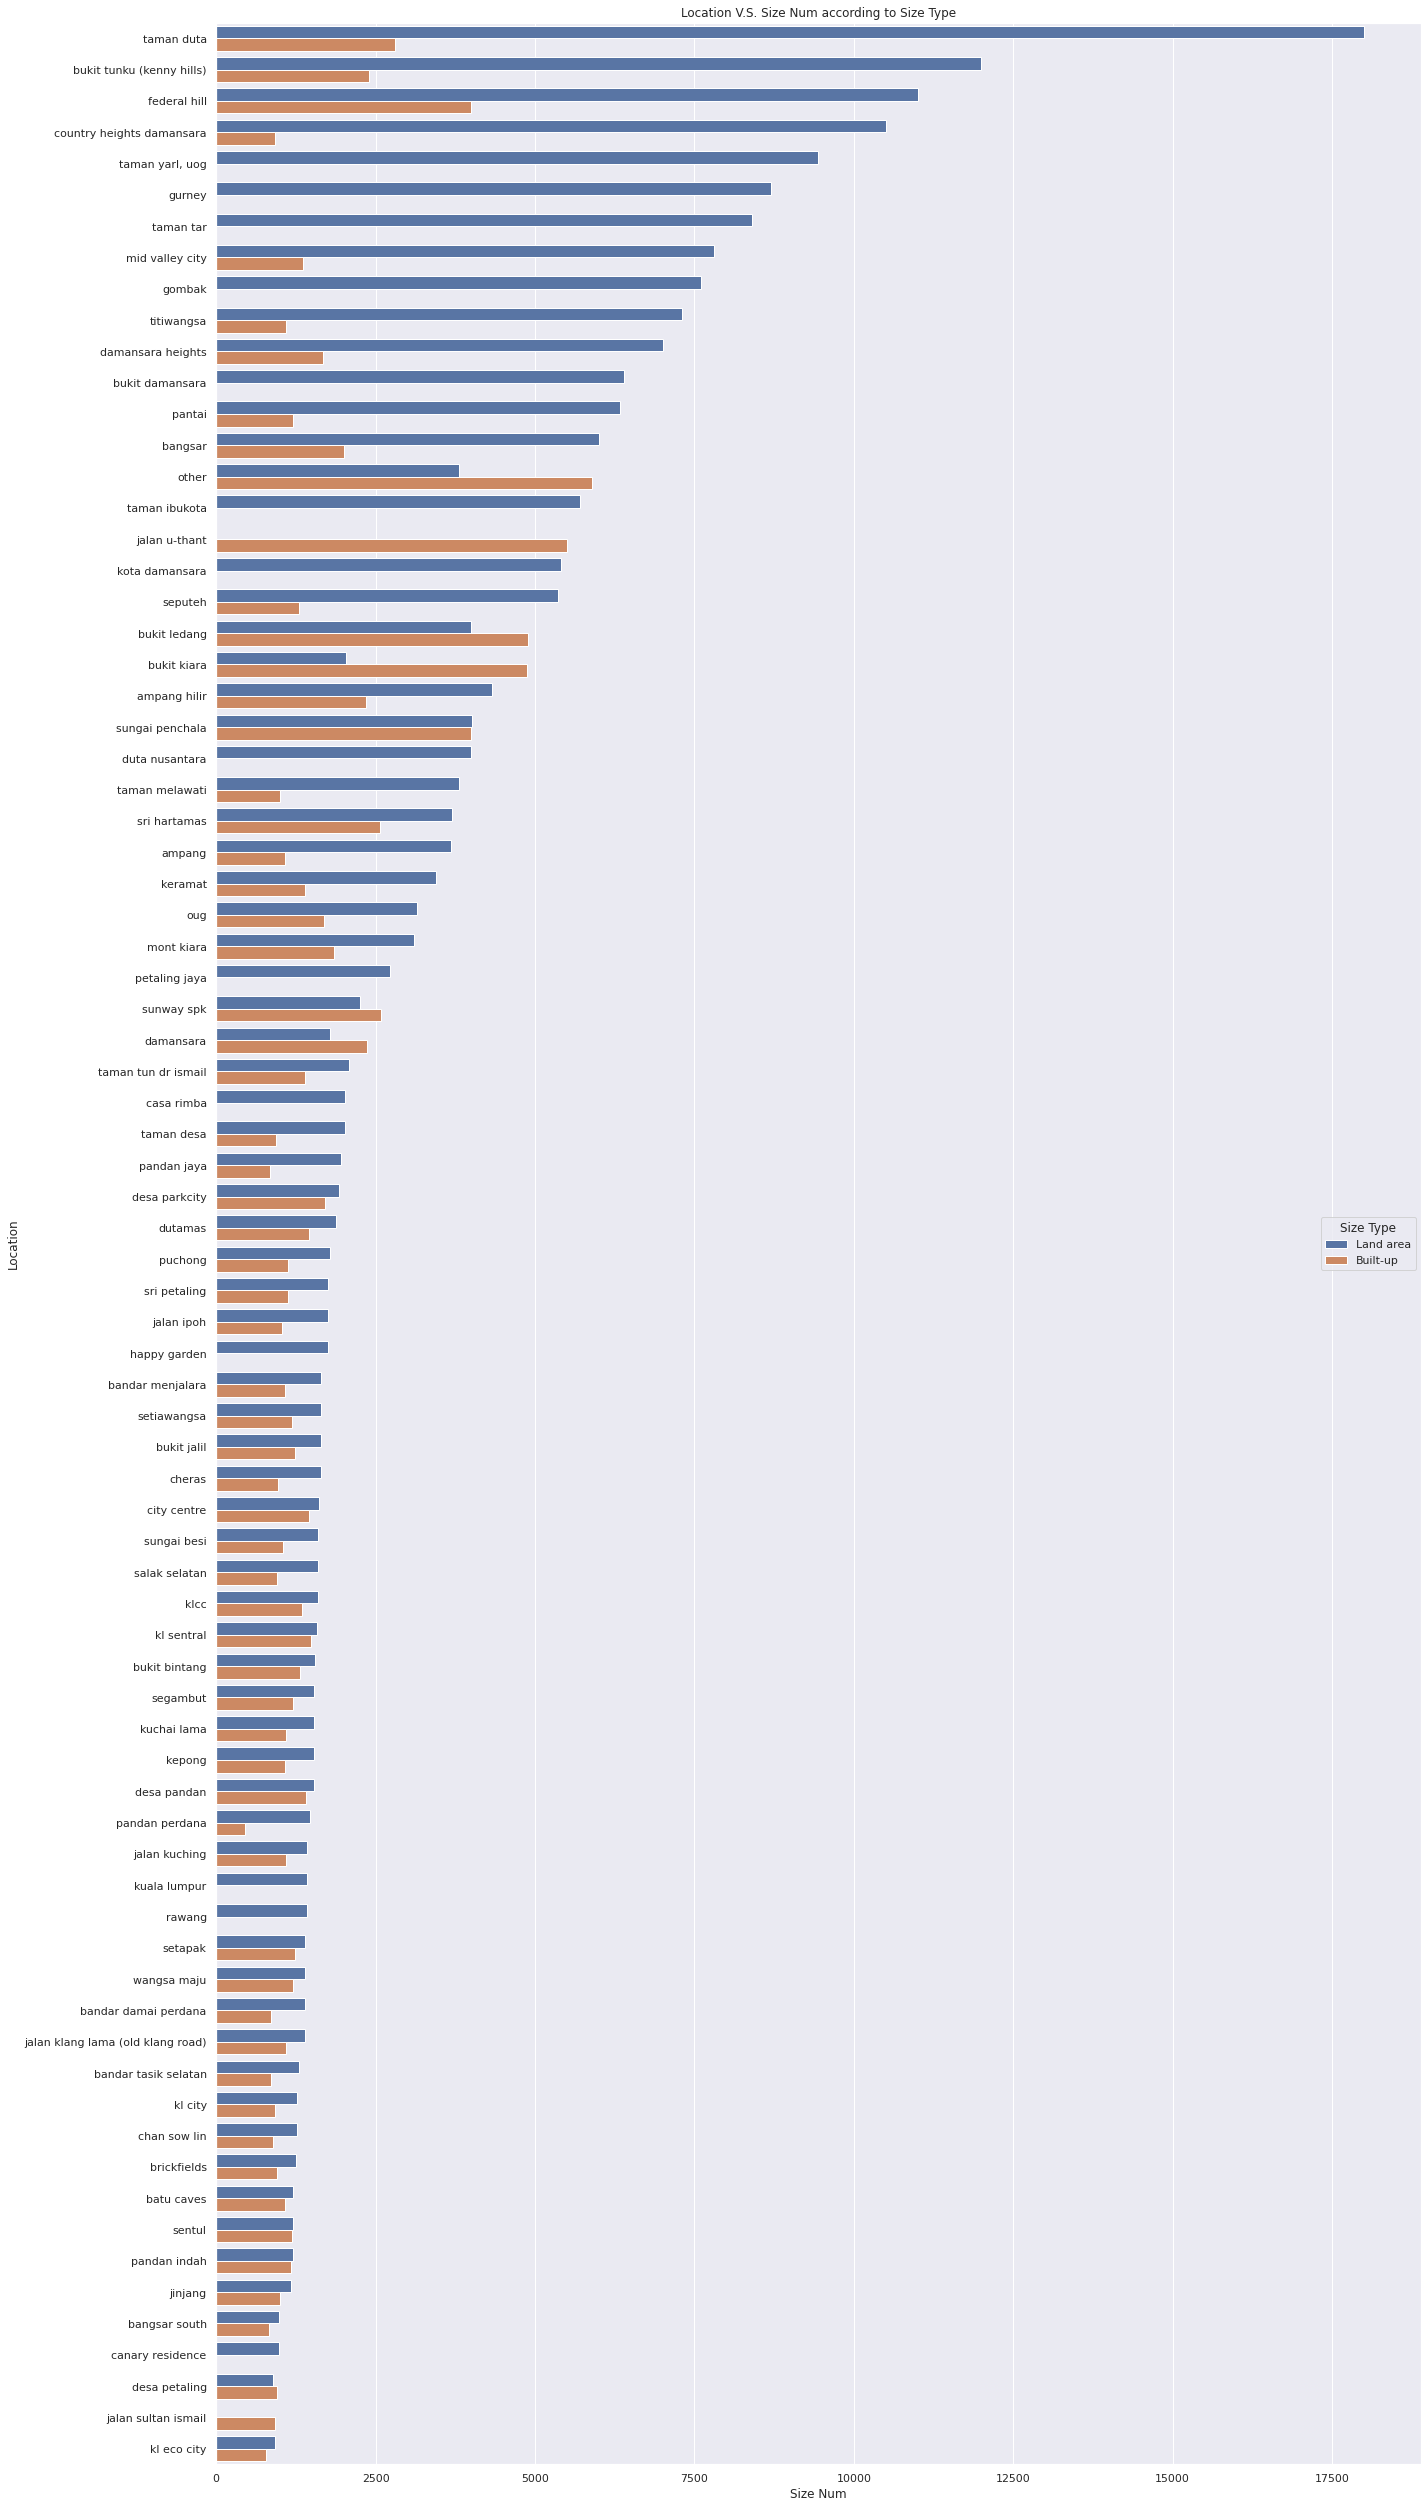

In [ ]:
#Graph 1 (Location vs Size Num according to Size Type)

sns.set(rc={'figure.figsize':(20,35)})
plt.title('Location V.S. Size Num according to Size Type')


group=df[["Location", "Size Type", "Size Num"]].groupby(
    ["Location", "Size Type"]).median().sort_values(ascending=False,by='Size Num').reset_index()
sns.barplot(data=group,x='Size Num',y='Location',hue='Size Type')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

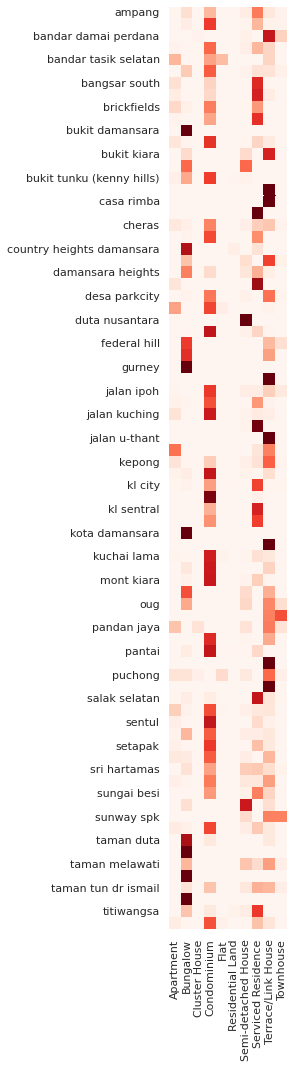

In [ ]:
#Graph 2 (Heatmap Property Type vs Location)


# Extract property type and turn it into a two-column data frame
prop = df.loc[~df["Property Type Supergroup"].isna()].groupby(
    "Location")["Property Type Supergroup"].value_counts()
prop.name = "Value"
prop = prop.reset_index().pivot(index="Location", columns="Property Type Supergroup")
prop.columns = prop.columns.droplevel(0)
prop = prop.fillna(0)

# normalize rows to see relative amount of properties in each neighborhood 
prop_norm = prop.apply(lambda x: x / x.sum(), axis=1)

fix, ax = plt.subplots(figsize=(12, 15))
hmap = sns.heatmap(
    prop_norm, square=True, vmin=0, cmap="Reds", ax=ax, cbar=False)
hmap.set_ylabel(None);
hmap.set_xlabel(None);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

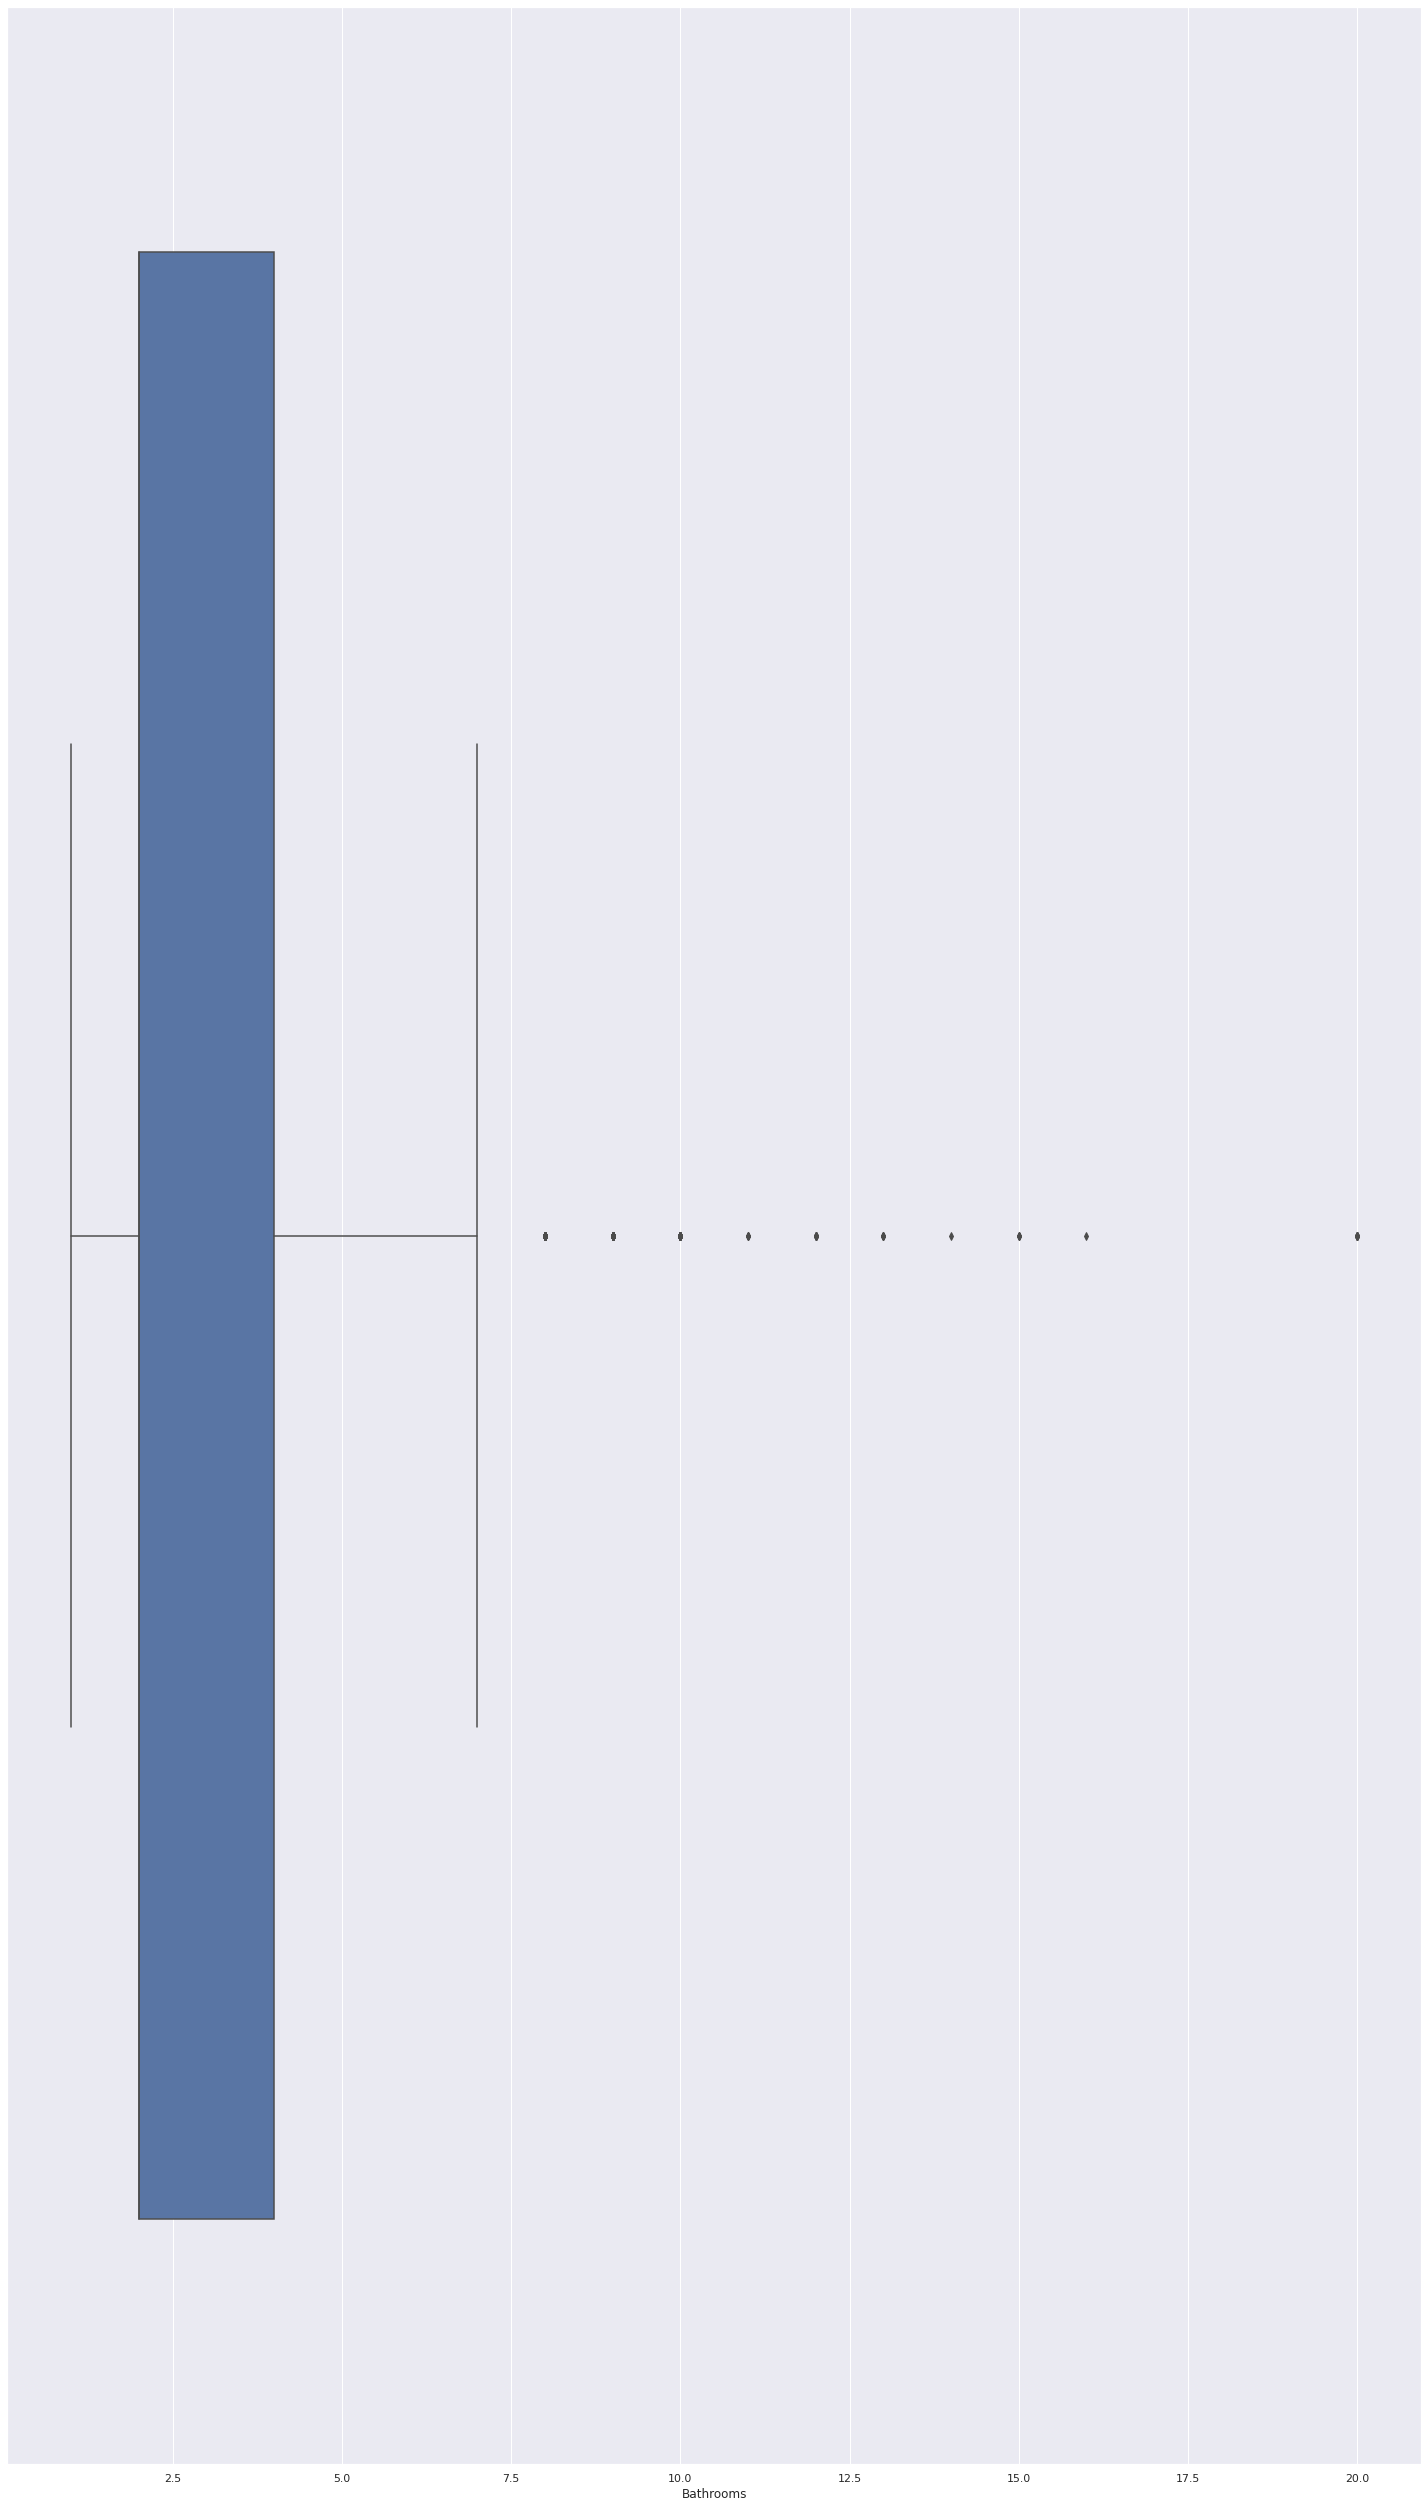

In [ ]:
#Identify the outliers for Bathrooms
sns.boxplot(x=df['Bathrooms'])

In [ ]:
#Remove outliers for bathrooms
Bathrooms_outlier = df[ (df['Bathrooms'] >= 8) ].index
Bathrooms_cleaned = df.drop(Bathrooms_outlier)
print(Bathrooms_cleaned['Bathrooms'].describe())

count    31584.000000
mean         2.874873
std          1.392094
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: Bathrooms, dtype: float64


Text(0.5, 1.0, 'Histogram of Number of Bathrooms by Property Type')

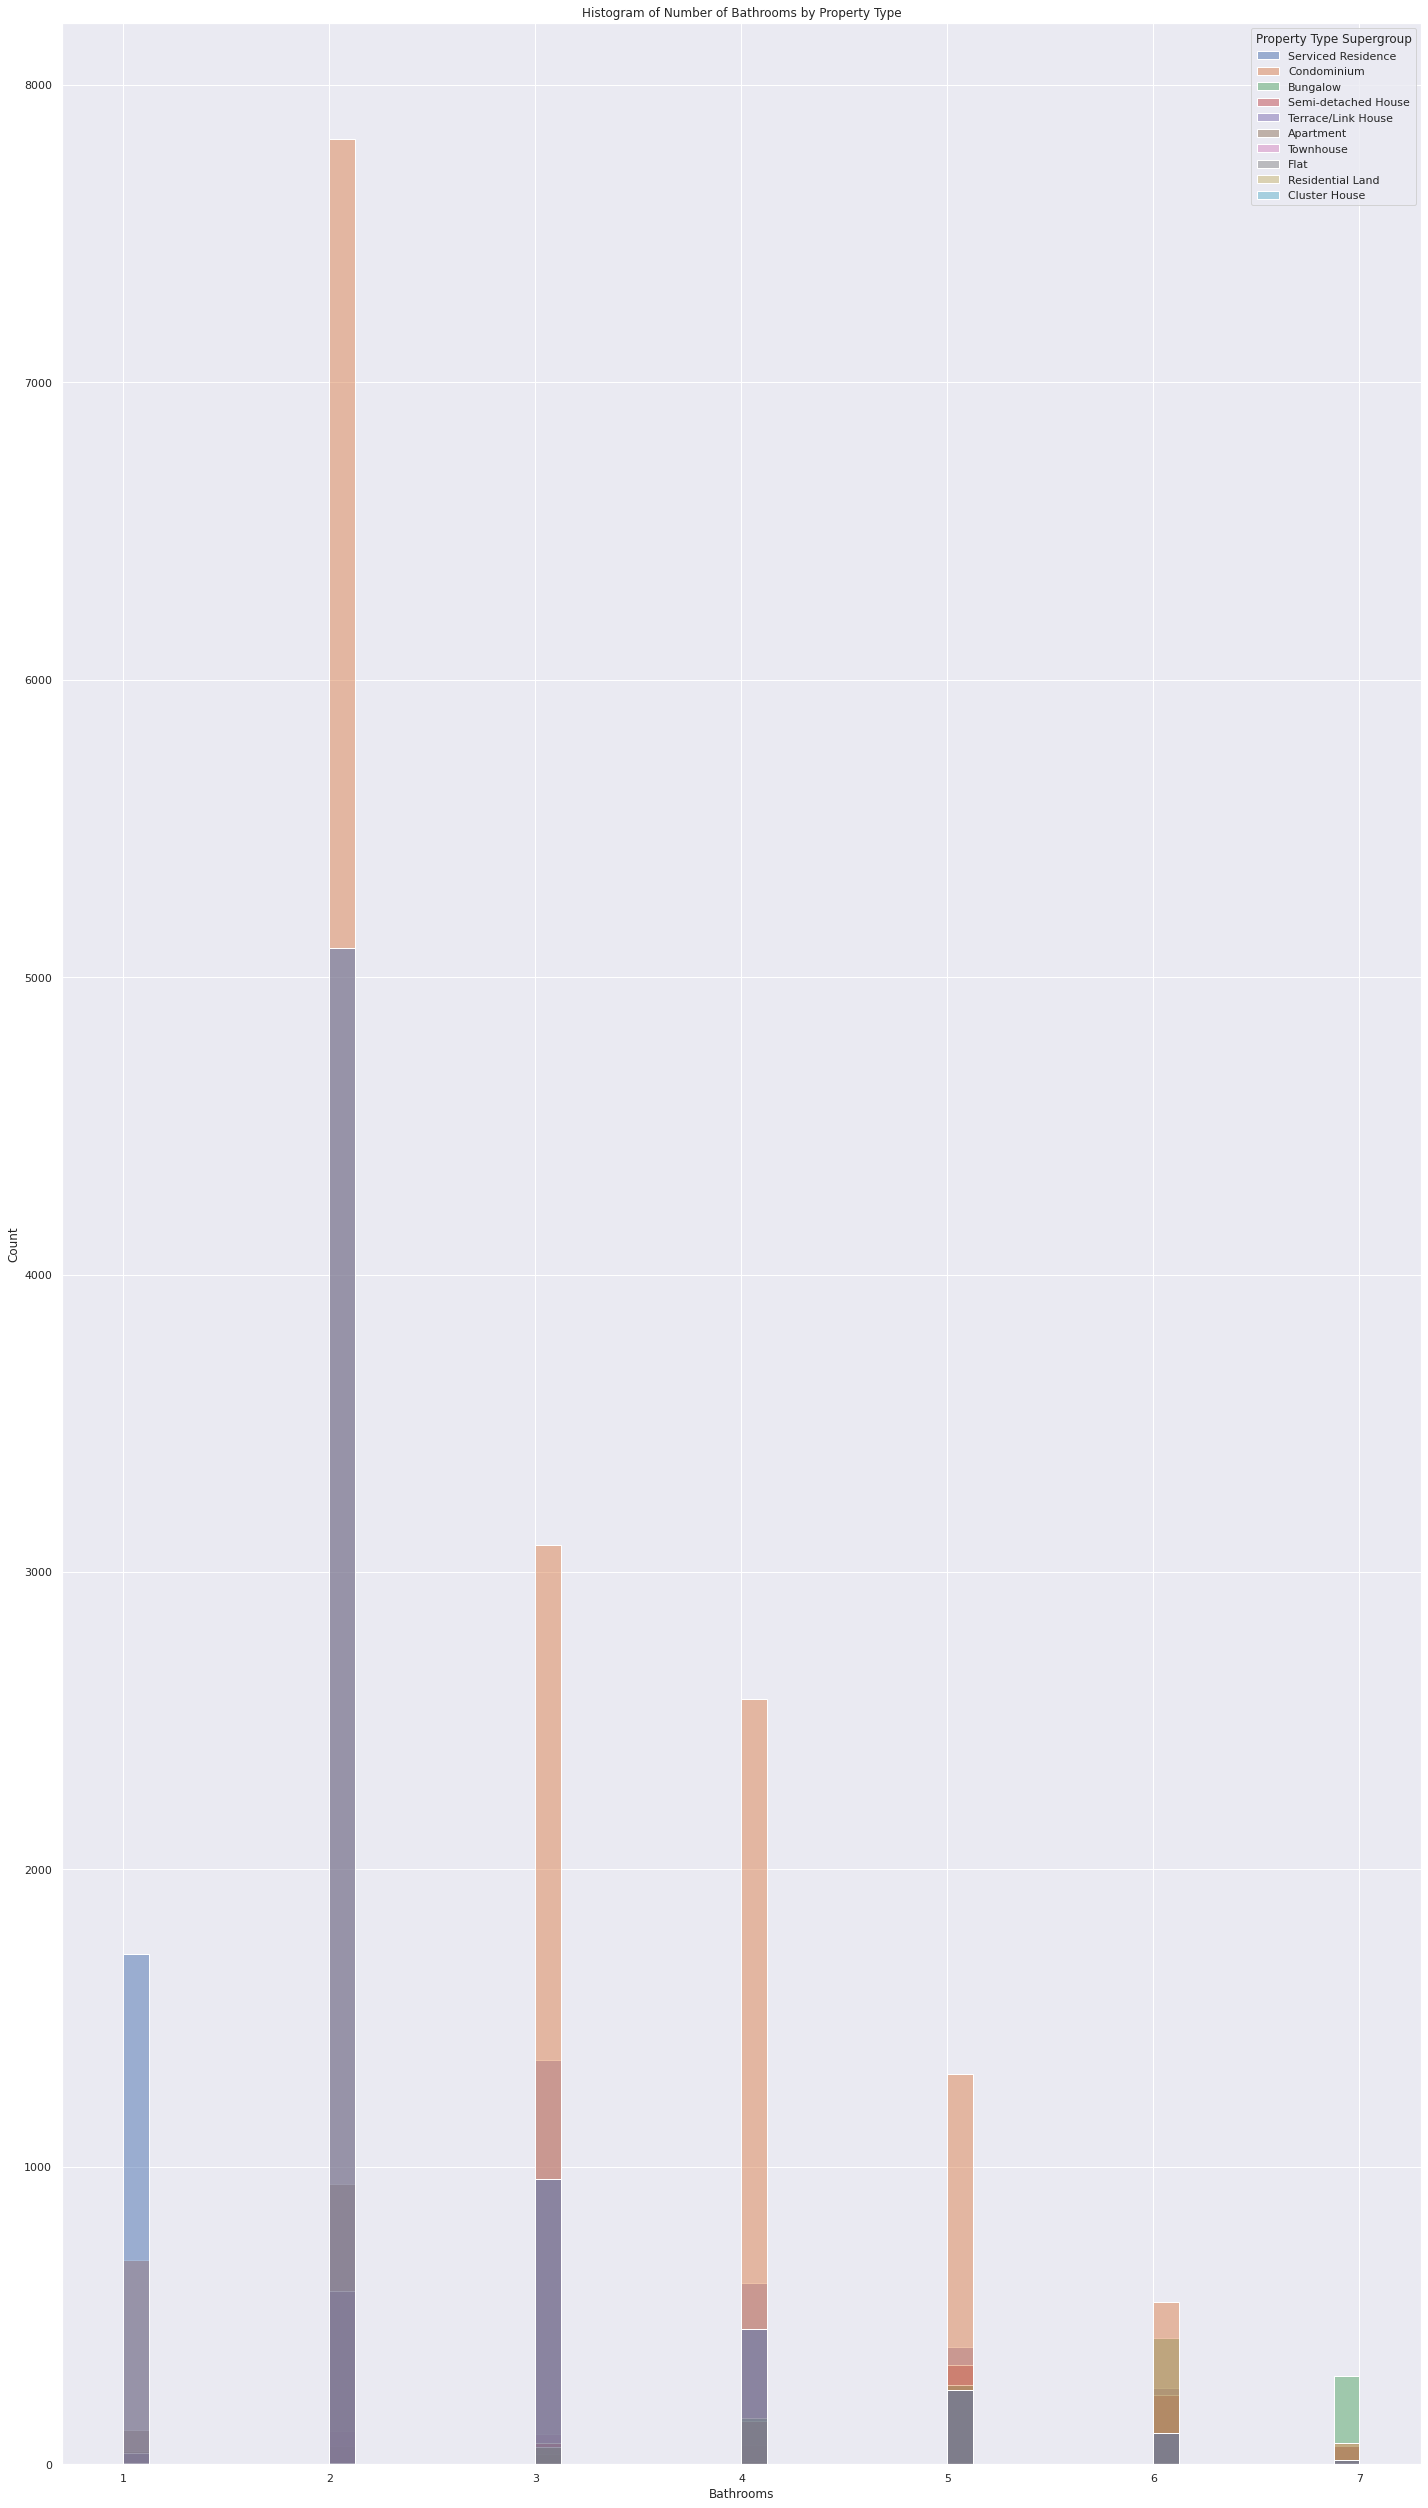

In [ ]:
# Graph 3 (Histograms for each Bathrooms according to Property Type)
sns.histplot(data=Bathrooms_cleaned, x='Bathrooms', hue="Property Type Supergroup")

# Add title
plt.title("Histogram of Number of Bathrooms by Property Type")

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

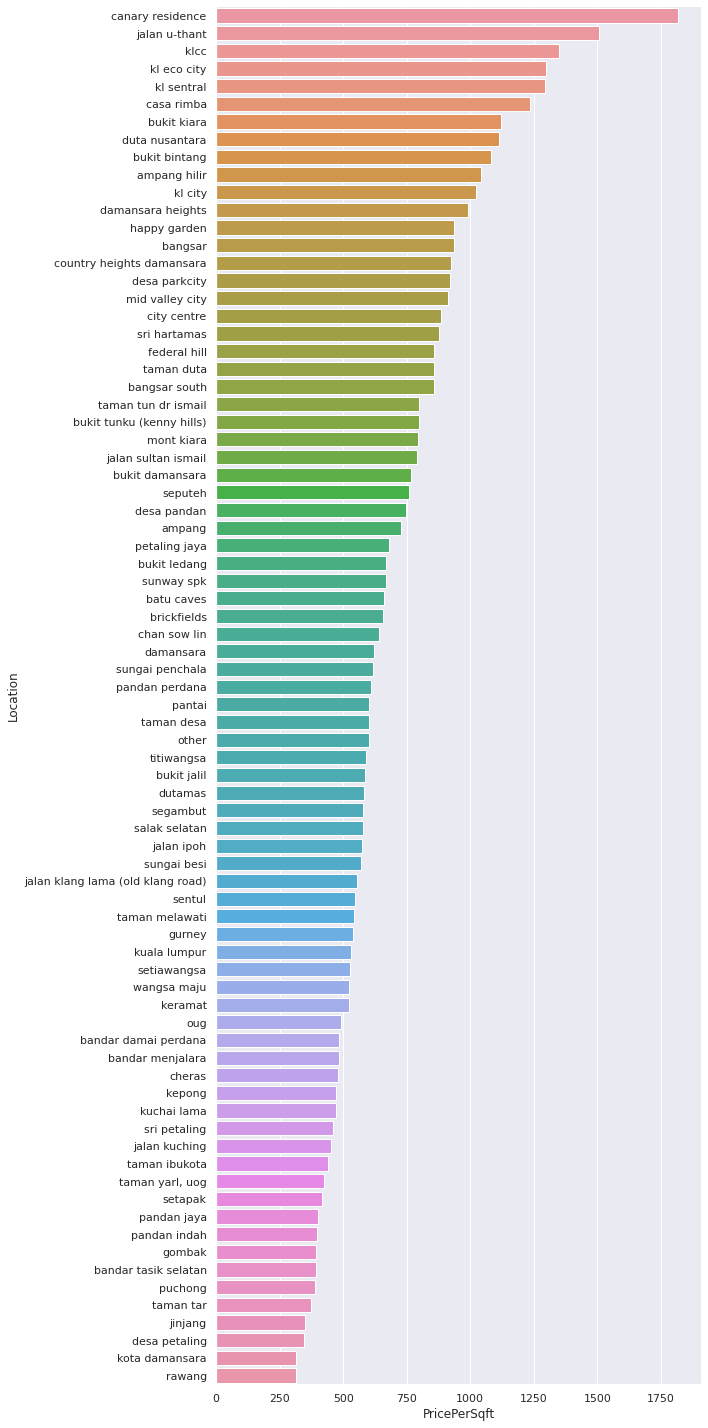

In [ ]:
#Graph 4 (Bar Chart of Price Per Sqft vs Location)

group=df.groupby("Location")['PricePerSqft'].median().sort_values(ascending=False).reset_index()

fig = sns.catplot(
        data=group, x="PricePerSqft", y="Location", kind="bar", 
         height=20, aspect=0.5)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [195]:
res = df[df['Size Type']=='Built-up']
res.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size Type,Size Num,PricePerSqft,Property Type Supergroup
0,klcc,1250000,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335.0,936.329588,Serviced Residence
2,dutamas,1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875.0,549.333333,Condominium
4,bukit jalil,900000,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513.0,594.844679,Condominium
9,sri petaling,385000,3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,Built-up,904.0,425.884956,Apartment
18,mont kiara,1780000,4+1,4.0,2.0,Condominium (Corner),"Built-up : 1,830 sq. ft.",Partly Furnished,Built-up,1830.0,972.677596,Condominium


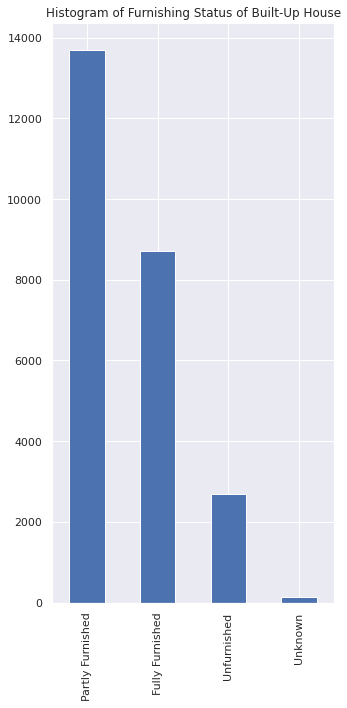

In [196]:
#Graph 5 (Histogram of Furnishing Status of Built-Up House)

plt.title("Histogram of Furnishing Status of Built-Up House")
plt.rcParams["figure.figsize"] = (5,10)
res.Furnishing.value_counts().plot(kind='bar')

                     Location    Price Rooms  Bathrooms  Car Parks  \
5         taman tun dr ismail  5350000   4+2        5.0        4.0   
7         taman tun dr ismail  2600000     5        4.0        4.0   
8         taman tun dr ismail  1950000   4+1        4.0        3.0   
13        taman tun dr ismail  4580000   6+1        5.0        5.0   
16  bukit tunku (kenny hills)  9000000   6+1        7.0        4.0   

                        Property Type                       Size  \
5                            Bungalow   Land area : 7200 sq. ft.   
7                 Semi-detached House   Land area : 3600 sq. ft.   
8   2-sty Terrace/Link House (EndLot)  Land area : 25x75 sq. ft.   
13            Bungalow (Intermediate)   Land area : 6000 sq. ft.   
16                  Bungalow (Corner)   Land area : 8500 sq. ft.   

          Furnishing  Size Type  Size Num  PricePerSqft  \
5   Partly Furnished  Land area    7200.0    743.055556   
7   Partly Furnished  Land area    3600.0    722.222

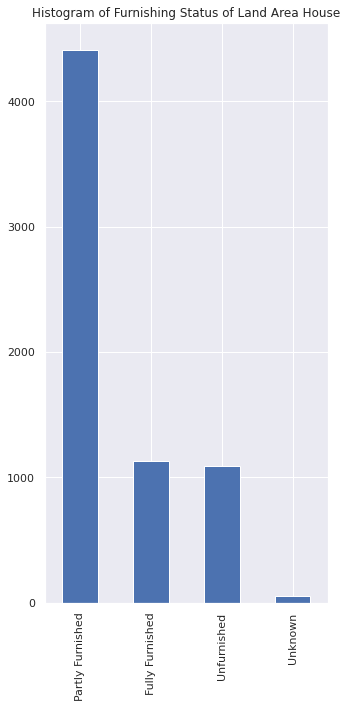

In [197]:
#Graph 5a (Histogram of Furnishing Status of Land Area House)

res1 = df[df['Size Type']=='Land area']
print(res1.head())
plt.title("Histogram of Furnishing Status of Land Area House")
plt.rcParams["figure.figsize"] = (5,10)
res1.Furnishing.value_counts().plot(kind='bar')

## Asking and Answering Questions


In this part, we are wish to ask 5 questions and answer through the graph plotted in our EDA


####**Question 1 : Which locations have the highest size of listed houses?**

**ANSWER:** Taman Duta, Bukit Tunku(Kenny Hills), Federal Hills, Country Heights Damansara, Taman yarl,uog are the Top 5 locations with highest size of renting houses.

[Graph 1](#scrollTo=-Scf_lKnVJJ7&line=5&uniqifier=1) - Click Here To Scroll

Tools used:

1.   Seaborn:Plot bar graph
2.   Pandas: Group By Location and Size Type
3.   Matplotlib: Title

####**Question 2 : What are the most common property type in each locations?**

**ANSWER:** 
Condominium and Serviced Residence are the most common property type listed for rent in Kuala Lumpur.

[Graph 2](#scrollTo=c7fugjWzVJJ7&line=10&uniqifier=1)- Click Here To Scroll


Tools used:

1.   Seaborn:Plot heatmap
2.   Pandas: Extract Property Type, Create new DataFrame, Group By Property Type, Fill null, transposing


####**Question 3 : What are the most common number of bathrooms in the houses of Kuala Lumpur?**

**ANSWER:** 
Houses in Kuala Lumpur usually have 2-3 bathrooms.

[Graph 3](#scrollTo=kMrm6CiAVJJ8&line=2&uniqifier=1)- Click Here To Scroll


Tools used:

1.   Seaborn:Plot histogram, boxplot
2.   Pandas: Remove outliers, count mean(Describe)
3.   Matplotlib: Title

In [ ]:
Bathrooms_cleaned['Bathrooms'].describe()

count    31584.000000
mean         2.874873
std          1.392094
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: Bathrooms, dtype: float64

####**Question 4 : What are the top 5 location in Kuala Lumpur with the highest/Lowest price per sqft?**

**ANSWER:** 

**Top 5 Highest Price Per Sqft**

Top 1 : Canary Residence

Top 2 : Jalan U-Thant

Top 3 : KLCC

Top 4 : KL Eco City

Top 5 : KL Sentral


**Top 5 Lowest Price Per Sqft**

Top 1 : Rawang

Top 2 : Kota Damansara

Top 3 : Desa Petaling

Top 4 : Jinjang

Top 5 : Taman Tar



[Graph 4](#scrollTo=fOQ9cTWiVJJ8&line=1&uniqifier=1)- Click Here To Scroll


Tools used:

1.   Seaborn:Plot categorical plot
2.   Pandas: Groupby,sort value by descending, reset index

####**Question 5 : How do landlords furnish their listed houses in Kuala Lumpur?**

**ANSWER:** 
Landlords that own Built-Up houses (36.54%) fully-furnished their house more often compared to land area landlords (16.94%).

[Graph 5](#scrollTo=Oz1EDBxLRH-A&line=1&uniqifier=1)- Click Here To Scroll
[Graph 5a](#scrollTo=RBYoxztOVJJ8&line=1&uniqifier=1)- Click Here To Scroll

Tools used:

1.   Pandas: get value_counts() of each unique furnished status
2.   Matplotlib: Plot histogram

In [207]:
res['Furnishing'].value_counts()

Partly Furnished    13687
Fully Furnished      8713
Unfurnished          2688
Unknown               135
Name: Furnishing, dtype: int64

In [208]:
#Fully furnished percentage for built-up houses
total = res['Furnishing'].value_counts().sum()
for val, cnt in res['Furnishing'].value_counts().iteritems():
    if val=='Fully Furnished':
      fully_furnished_percent = cnt/total*100

print(fully_furnished_percent)

34.543868691273836


In [200]:
res1['Furnishing'].value_counts()

Partly Furnished    4406
Fully Furnished     1131
Unfurnished         1087
Unknown               52
Name: Furnishing, dtype: int64

In [209]:
#Fully furnished percentage for land area houses
total = res1['Furnishing'].value_counts().sum()
for val, cnt in res1['Furnishing'].value_counts().iteritems():
    if val=='Fully Furnished':
      fully_furnished_percent = cnt/total*100

print(fully_furnished_percent)

16.941282204913122


## Inferences and Conclusion

**Inferences:** Taman Duta, Bukit Tunku(Kenny Hills), Federal Hills, Country Heights Damansara, Taman yarl,uog are the Top 5 locations with highest size of renting houses. Condominium and Serviced Residence are the most common property type listed for rent in Kuala Lumpur. Houses in Kuala Lumpur usually have 2-3 bathrooms. Landlords that own Built-Up houses (36.54%) fully-furnished their house more often compared to land area landlords (16.94%). Canary Residence, Jalan U-Thant, KLCC, KL Eco City, KL Sentral are the most expensive listed houses for each sqft owned while Rawang, Kota Damansara, Desa Petaling, Jinjang and Taman Tar are the cheapest one.

**Conclusion:** 
We can give these following recommendations to customers based on their intention/interest for buying houses in Kuala Lumpur.

1.   If you wish to have big houses: Taman Duta, Bukit Tunku(Kenny Hills), Federal Hills

2.   If you wish to have the most affordable houses in KL : Rawang, Kota Damansara, and Desa Petaling

3.   If you wish to show off yourself in terms of money: Canary Residence, Jalan U-Thant, KLCC

4.   You are more likely to get fully furnished houses if you pick Built-Up Houses


## References and Future Work


References:
https://www.kaggle.com/code/dragonduck/property-listing-analysis